# 프로그램 설명

전체 주식정보를 읽고, NaN값이 있는 항을 다 삭제하고, 특정 회사의 정보를 추출해 추이를 분석함

## 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from freeman.task.trading.config import *

## 원본 데이터 불러오기

In [2]:
company_df = pd.read_csv(KRX_COMPANY_FILE_INFO, 
                         delimiter=",", encoding="CP949",
                         skiprows=[0], names=KRX_COMPANY_COLUMNS)
merge_df = pd.read_csv(KRX_MERGE_1012_INFO, sep=",")

In [3]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2657 entries, 0 to 2656
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   code            2657 non-null   object
 1   short_code      2657 non-null   object
 2   name_kr         2657 non-null   object
 3   short_name_kr   2657 non-null   object
 4   name_en         2657 non-null   object
 5   listing_date    2657 non-null   object
 6   type_market     2657 non-null   object
 7   type_stock      2657 non-null   object
 8   affiliated      1717 non-null   object
 9   category_stock  2657 non-null   object
 10  par_value       2657 non-null   object
 11  num_listed      2657 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 249.2+ KB


In [4]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11310104 entries, 0 to 11310103
Data columns (total 14 columns):
 #   Column    Dtype  
---  ------    -----  
 0   com_code  object 
 1   com_name  object 
 2   m_type    object 
 3   close     float64
 4   diff      float64
 5   ratio     float64
 6   open      float64
 7   high      float64
 8   low       float64
 9   volume    float64
 10  value     float64
 11  t_value   float64
 12  t_volume  int64  
 13  date      object 
dtypes: float64(9), int64(1), object(4)
memory usage: 1.2+ GB


## 전처리

### 원본 데이터 처리

#### NaN 삭제

In [5]:
# NaN 값이 있는 행 모두 삭제
merge_df.dropna(inplace=True)

In [6]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11139085 entries, 0 to 11310103
Data columns (total 14 columns):
 #   Column    Dtype  
---  ------    -----  
 0   com_code  object 
 1   com_name  object 
 2   m_type    object 
 3   close     float64
 4   diff      float64
 5   ratio     float64
 6   open      float64
 7   high      float64
 8   low       float64
 9   volume    float64
 10  value     float64
 11  t_value   float64
 12  t_volume  int64  
 13  date      object 
dtypes: float64(9), int64(1), object(4)
memory usage: 1.2+ GB


### 특정회사 정보 처리

#### 추출

In [7]:
special_df = merge_df[merge_df["com_name"]==SPECIAL_COMPANY].copy(deep=True)

In [8]:
special_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5525 entries, 604 to 11308440
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   com_code  5525 non-null   object 
 1   com_name  5525 non-null   object 
 2   m_type    5525 non-null   object 
 3   close     5525 non-null   float64
 4   diff      5525 non-null   float64
 5   ratio     5525 non-null   float64
 6   open      5525 non-null   float64
 7   high      5525 non-null   float64
 8   low       5525 non-null   float64
 9   volume    5525 non-null   float64
 10  value     5525 non-null   float64
 11  t_value   5525 non-null   float64
 12  t_volume  5525 non-null   int64  
 13  date      5525 non-null   object 
dtypes: float64(9), int64(1), object(4)
memory usage: 647.5+ KB


In [9]:
special_df.tail()

,com_code,com_name,m_type,close,diff,ratio,open,high,low,volume,value,t_value,t_volume,date
11297823,005930,삼성전자,KOSPI,56000.0,800.0,1.45,56900.0,57200.0,55400.0,22458970.0,1.261934e+12,3.343078e+14,5969782550,2022-10-05
11300474,005930,삼성전자,KOSPI,56300.0,300.0,0.54,56700.0,57300.0,56300.0,14944446.0,8.480818e+11,3.360988e+14,5969782550,2022-10-06
11303128,005930,삼성전자,KOSPI,56200.0,-100.0,-0.18,55900.0,56900.0,55200.0,16886813.0,9.490271e+11,3.355018e+14,5969782550,2022-10-07
11305784,005930,삼성전자,KOSPI,55400.0,-800.0,-1.42,54400.0,55700.0,54000.0,21437877.0,1.172169e+12,3.307260e+14,5969782550,2022-10-11
11308440,005930,삼성전자,KOSPI,55800.0,400.0,0.72,55700.0,57000.0,55200.0,18408910.0,1.032656e+12,3.331139e+14,5969782550,2022-10-12


#### 날짜정보 변환

In [10]:
special_df["date"] = pd.to_datetime(special_df["date"])
special_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5525 entries, 604 to 11308440
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   com_code  5525 non-null   object        
 1   com_name  5525 non-null   object        
 2   m_type    5525 non-null   object        
 3   close     5525 non-null   float64       
 4   diff      5525 non-null   float64       
 5   ratio     5525 non-null   float64       
 6   open      5525 non-null   float64       
 7   high      5525 non-null   float64       
 8   low       5525 non-null   float64       
 9   volume    5525 non-null   float64       
 10  value     5525 non-null   float64       
 11  t_value   5525 non-null   float64       
 12  t_volume  5525 non-null   int64         
 13  date      5525 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1), object(3)
memory usage: 647.5+ KB


##### 날짜정보 컬럼 추가

In [11]:
special_df["year"] = special_df["date"].dt.year
special_df["day_of_week"] = special_df["date"].dt.day_of_week

#### 증감자 포인트 추출

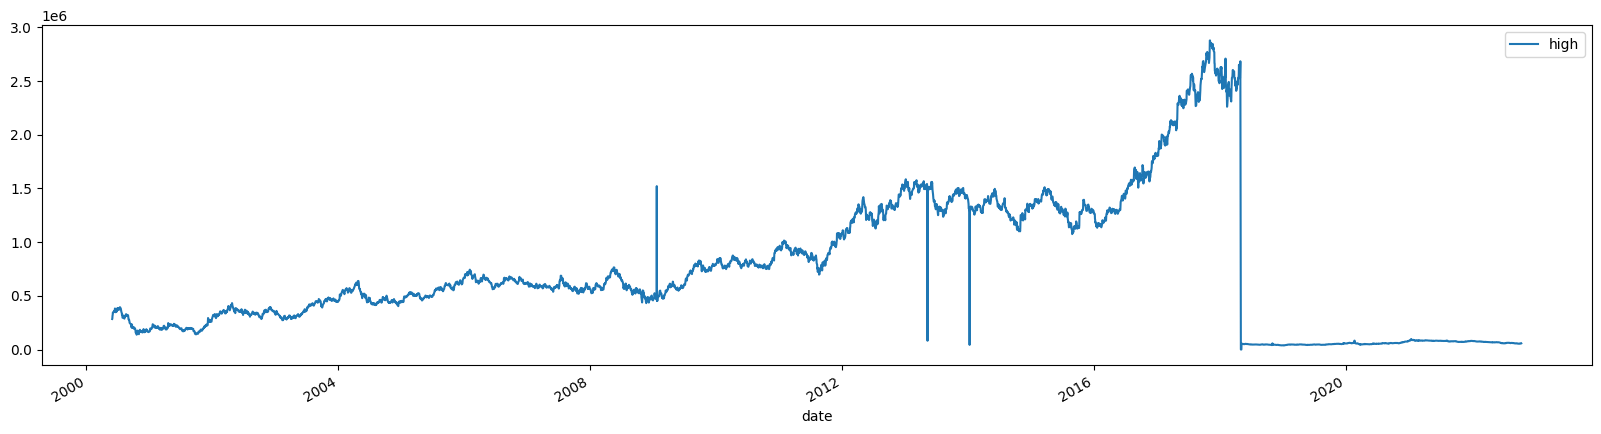

In [12]:
special_df[["high", "date"]].plot(x="date", figsize=(20,5))
plt.show()

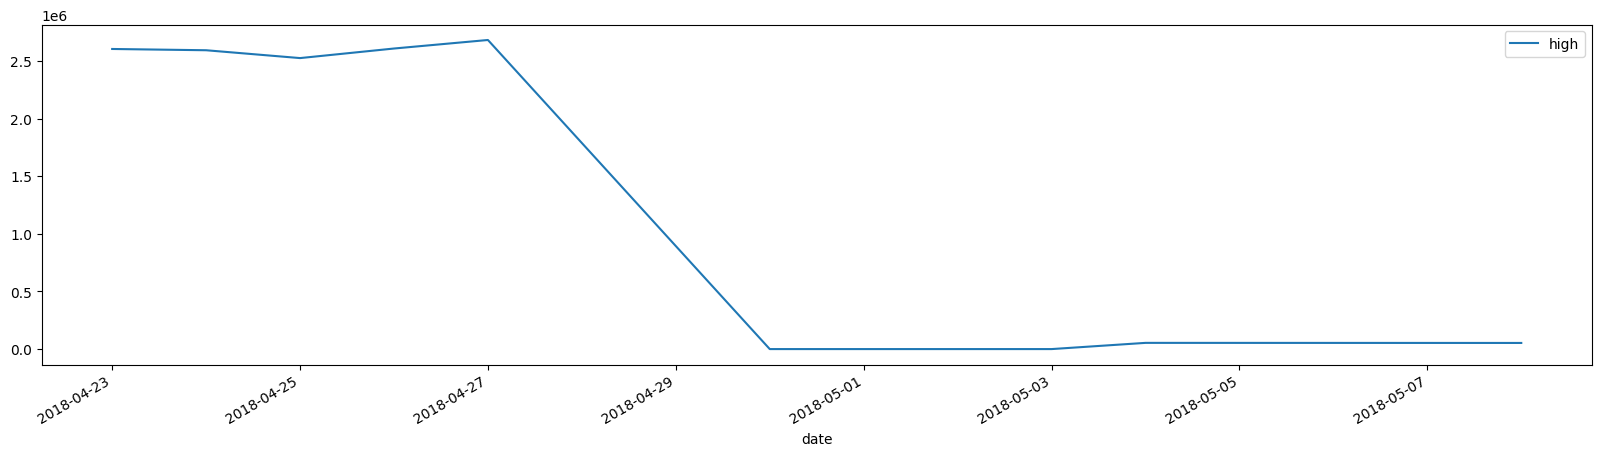

In [13]:
special_df[["high", "date"]].iloc[-1100:-1090].plot(x="date", figsize=(20,5))
plt.show()

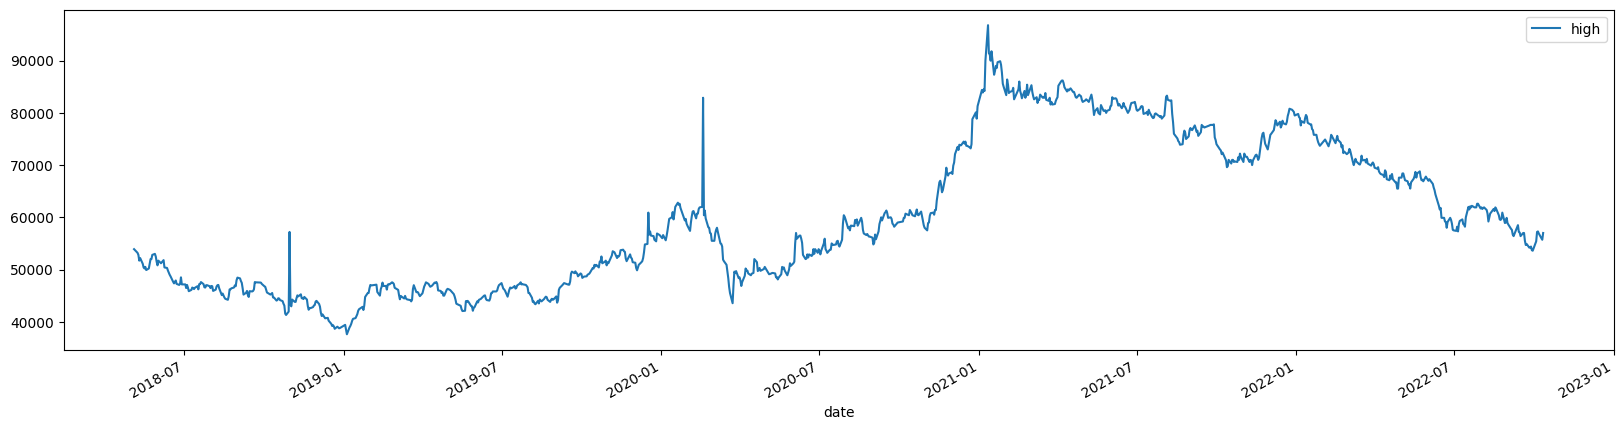

In [14]:
special_df[special_df["date"].astype("str") > "2018-05-03"][["high", "date"]].plot(x="date", figsize=(20,5))
plt.show()

In [15]:
special_df[special_df["date"].astype("str").isin(["2018-05-03", "2018-05-04"])]

,com_code,com_name,m_type,close,diff,ratio,open,high,low,volume,value,t_value,t_volume,date,year,day_of_week
8589487,005930,삼성전자,KOSPI,2650000.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000e+00,3.402242e+14,128386494,2018-05-03,2018,3
8591799,005930,삼성전자,KOSPI,51900.0,-1100.0,-2.08,53000.0,53900.0,51800.0,39565391.0,2.078018e+12,3.331630e+14,6419324700,2018-05-04,2018,4


In [16]:
data_df = special_df[special_df["date"].astype("str") > "2018-05-03"].copy(deep=True)

In [17]:
data_df.shape

(1092, 16)

In [18]:
data_df.reset_index(inplace=True)

In [19]:
data_df

,index,com_code,com_name,m_type,close,diff,ratio,open,high,low,volume,value,t_value,t_volume,date,year,day_of_week
0,8591799,005930,삼성전자,KOSPI,51900.0,-1100.0,-2.08,53000.0,53900.0,51800.0,39565391.0,2.078018e+12,3.331630e+14,6419324700,2018-05-04,2018,4
1,8594111,005930,삼성전자,KOSPI,52600.0,700.0,1.35,52600.0,53200.0,51900.0,23104720.0,1.218273e+12,3.376565e+14,6419324700,2018-05-08,2018,1
2,8596423,005930,삼성전자,KOSPI,50900.0,-1700.0,-3.23,52600.0,52800.0,50900.0,16128305.0,8.313719e+11,3.267436e+14,6419324700,2018-05-09,2018,2
3,8598734,005930,삼성전자,KOSPI,51600.0,700.0,1.38,51700.0,51700.0,50600.0,13905263.0,7.122057e+11,3.312372e+14,6419324700,2018-05-10,2018,3
4,8601045,005930,삼성전자,KOSPI,51300.0,-300.0,-0.58,52000.0,52200.0,51200.0,10314997.0,5.337650e+11,3.293114e+14,6419324700,2018-05-11,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,11297823,005930,삼성전자,KOSPI,56000.0,800.0,1.45,56900.0,57200.0,55400.0,22458970.0,1.261934e+12,3.343078e+14,5969782550,2022-10-05,2022,2
1088,11300474,005930,삼성전자,KOSPI,56300.0,300.0,0.54,56700.0,57300.0,56300.0,14944446.0,8.480818e+11,3.360988e+14,5969782550,2022-10-06,2022,3
1089,11303128,005930,삼성전자,KOSPI,56200.0,-100.0,-0.18,55900.0,56900.0,55200.0,16886813.0,9.490271e+11,3.355018e+14,5969782550,2022-10-07,2022,4
1090,11305784,005930,삼성전자,KOSPI,55400.0,-800.0,-1.42,54400.0,55700.0,54000.0,21437877.0,1.172169e+12,3.307260e+14,5969782550,2022-10-11,2022,1


#### 훈련 데이터로 변환

In [20]:
data_df = data_df[["date", "open", "low", "high", "close", "diff", "ratio", "volume", "value", "t_value", "t_volume", "year", "day_of_week"]].copy(deep=True)
data_df.set_index("date")

,open,low,high,close,diff,ratio,volume,value,t_value,t_volume,year,day_of_week
date,,,,,,,,,,,,
2018-05-04,53000.0,51800.0,53900.0,51900.0,-1100.0,-2.08,39565391.0,2.078018e+12,3.331630e+14,6419324700,2018,4
2018-05-08,52600.0,51900.0,53200.0,52600.0,700.0,1.35,23104720.0,1.218273e+12,3.376565e+14,6419324700,2018,1
2018-05-09,52600.0,50900.0,52800.0,50900.0,-1700.0,-3.23,16128305.0,8.313719e+11,3.267436e+14,6419324700,2018,2
2018-05-10,51700.0,50600.0,51700.0,51600.0,700.0,1.38,13905263.0,7.122057e+11,3.312372e+14,6419324700,2018,3
2018-05-11,52000.0,51200.0,52200.0,51300.0,-300.0,-0.58,10314997.0,5.337650e+11,3.293114e+14,6419324700,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-05,56900.0,55400.0,57200.0,56000.0,800.0,1.45,22458970.0,1.261934e+12,3.343078e+14,5969782550,2022,2
2022-10-06,56700.0,56300.0,57300.0,56300.0,300.0,0.54,14944446.0,8.480818e+11,3.360988e+14,5969782550,2022,3
2022-10-07,55900.0,55200.0,56900.0,56200.0,-100.0,-0.18,16886813.0,9.490271e+11,3.355018e+14,5969782550,2022,4


#### 0~1로 각 항목 정규화

In [21]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1092.0,5.954103e+04,1.385758e+04,3.745000e+04,4.685000e+04,5.670000e+04,7.202500e+04,9.030000e+04
low,1092.0,5.896827e+04,1.377152e+04,3.685000e+04,4.630000e+04,5.600000e+04,7.130000e+04,8.950000e+04
high,1092.0,6.008988e+04,1.394130e+04,3.760000e+04,4.715000e+04,5.735000e+04,7.245000e+04,9.680000e+04
close,1092.0,5.950412e+04,1.382837e+04,3.745000e+04,4.683750e+04,5.650000e+04,7.150000e+04,9.100000e+04
diff,1092.0,1.236264e+00,9.390894e+02,-3.000000e+03,-5.625000e+02,0.000000e+00,5.000000e+02,5.900000e+03
ratio,1092.0,1.516484e-02,1.610236e+00,-6.390000e+00,-9.900000e-01,0.000000e+00,8.600000e-01,1.047000e+01
volume,1092.0,1.602973e+07,8.483776e+06,4.406531e+06,1.052385e+07,1.406092e+07,1.878134e+07,9.030618e+07
value,1092.0,9.873471e+11,6.465140e+11,2.182632e+11,5.333063e+11,8.690210e+11,1.224428e+12,8.379238e+12
t_value,1092.0,3.580109e+14,8.013500e+13,2.235684e+14,2.906538e+14,3.377731e+14,4.268395e+14,5.432502e+14
t_volume,1092.0,6.030298e+09,1.535046e+08,5.969783e+09,5.969783e+09,5.969783e+09,5.969783e+09,6.419325e+09


In [22]:
max_value = data_df.describe().T["max"]

In [23]:
data_df["open"] = data_df["open"] / max_value["high"]
data_df["close"] = data_df["close"] / max_value["high"]
data_df["high"] = data_df["high"] / max_value["high"]
data_df["low"] = data_df["low"] / max_value["high"]

data_df["diff"] = data_df["diff"] / max_value["diff"]
data_df["ratio"] = data_df["ratio"] / max_value["ratio"]

data_df["volume"] = data_df["volume"] / max_value["volume"]
data_df["value"] = data_df["value"] / max_value["value"]
data_df["t_value"] = data_df["t_value"] / max_value["t_value"]
data_df["t_volume"] = data_df["t_volume"] / max_value["t_volume"]
data_df["year"] = data_df["year"] / max_value["year"]
data_df["day_of_week"] = data_df["day_of_week"] / max_value["day_of_week"]

data_df

,date,open,low,high,close,diff,ratio,volume,value,t_value,t_volume,year,day_of_week
0,2018-05-04,0.547521,0.535124,0.556818,0.536157,-0.186441,-0.198663,0.438125,0.247996,0.613277,1.00000,0.998022,1.00
1,2018-05-08,0.543388,0.536157,0.549587,0.543388,0.118644,0.128940,0.255849,0.145392,0.621549,1.00000,0.998022,0.25
2,2018-05-09,0.543388,0.525826,0.545455,0.525826,-0.288136,-0.308500,0.178596,0.099218,0.601461,1.00000,0.998022,0.50
3,2018-05-10,0.534091,0.522727,0.534091,0.533058,0.118644,0.131805,0.153979,0.084996,0.609732,1.00000,0.998022,0.75
4,2018-05-11,0.537190,0.528926,0.539256,0.529959,-0.050847,-0.055396,0.114222,0.063701,0.606187,1.00000,0.998022,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,2022-10-05,0.587810,0.572314,0.590909,0.578512,0.135593,0.138491,0.248698,0.150602,0.615385,0.92997,1.000000,0.50
1088,2022-10-06,0.585744,0.581612,0.591942,0.581612,0.050847,0.051576,0.165486,0.101212,0.618681,0.92997,1.000000,0.75
1089,2022-10-07,0.577479,0.570248,0.587810,0.580579,-0.016949,-0.017192,0.186995,0.113259,0.617582,0.92997,1.000000,1.00
1090,2022-10-11,0.561983,0.557851,0.575413,0.572314,-0.135593,-0.135626,0.237391,0.139890,0.608791,0.92997,1.000000,0.25


#### 레이블 추가
다음날의 종가를 오늘의 레이블로 추가

#### 훈련/시험 데이터 분리

In [24]:
train_df = data_df[:-79].copy(deep=True).set_index("date")
test_df = data_df[-79:].copy(deep=True).set_index("date")

In [25]:
train_df.shape, test_df.shape

((1013, 12), (79, 12))

In [26]:
train_df.tail(1)

,open,low,high,close,diff,ratio,volume,value,t_value,t_volume,year,day_of_week
date,,,,,,,,,,,,
2022-06-16,0.633264,0.625,0.63843,0.629132,0.033898,0.031519,0.259062,0.170786,0.669231,0.92997,1.0,0.75


In [27]:
test_df.head(1)

,open,low,high,close,diff,ratio,volume,value,t_value,t_volume,year,day_of_week
date,,,,,,,,,,,,
2022-06-17,0.613636,0.613636,0.618802,0.617769,-0.186441,-0.172875,0.321722,0.206755,0.657143,0.92997,1.0,1.0


##### 임시저장

In [28]:
train_df.to_csv("/home/freeman/projects/data/trading/data/train_5930.csv")
test_df.to_csv("/home/freeman/projects/data/trading/data/test_5930.csv")

##### 불러오기

In [29]:
train_df = pd.read_csv("/home/freeman/projects/data/trading/data/train_5930.csv", sep=",")
test_df = pd.read_csv("/home/freeman/projects/data/trading/data/test_5930.csv", sep=",")